# PCA Implementation

Principal Component Analysis (PCA) serves as a potent method to condense high-dimensional datasets into a more manageable form without losing essential information. By identifying and capturing the most influential aspects of the data, PCA enables efficient visualization or analysis. Its primary goal is dimensionality reduction while retaining as much variance as possible.

Implemented as a linear transformation, PCA reorients the data along its principal components, which are orthogonal directions capturing the maximum variance. By discarding less significant components, it constructs a lower-dimensional representation that often maintains the crucial features of the original data.

In practice, PCA proves invaluable for visualizing complex data in lower-dimensional spaces, aiding in data exploration, identifying patterns, or preparing data for machine learning models. However, it's important to note that reducing dimensions through PCA can potentially obscure interpretability and may not always guarantee the retention of all significant information, necessitating careful evaluation of the trade-offs when implementing this technique.

In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pandas as pd

# Load the dataset
data_df = pd.read_csv("/content/sample_data/Real estate.csv")

# Display dataset shape
print(data_df.shape)

# Prepare the data: Dropping the 'No' column and standardizing features
data_df = data_df.drop(['No'], axis=1)
scaler = StandardScaler()

# Standardize each feature using StandardScaler
for feature in data_df.columns[:-1]:
    data_df[[feature]] = scaler.fit_transform(data_df[[feature]])

# Separate into features (X) and target (y)
X = data_df[data_df.columns[:-1]]
y = data_df[data_df.columns[-1]]

# Reduce dimensions using PCA to visualize the components (1 component here)
pca = PCA(n_components=1)
X = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


(414, 8)


The code loads a dataset ('Real estate.csv'), standardizes its features, reduces dimensionality using PCA to one component for visualization, and splits the dataset into training and testing sets. Below, we will review the impacts of reducing the data

KNeighborsRegressor(n_neighbors=4) PCA: 1 MSE: 72.6
LinearRegression() PCA: 1 MSE: 78.03
DecisionTreeRegressor(max_depth=3) PCA: 1 MSE: 69.09
SVR() PCA: 1 MSE: 70.91
KNeighborsRegressor(n_neighbors=4) PCA: 2 MSE: 87.28
LinearRegression() PCA: 2 MSE: 76.38
DecisionTreeRegressor(max_depth=3) PCA: 2 MSE: 69.48
SVR() PCA: 2 MSE: 67.95
KNeighborsRegressor(n_neighbors=4) PCA: 3 MSE: 56.6
LinearRegression() PCA: 3 MSE: 67.15
DecisionTreeRegressor(max_depth=3) PCA: 3 MSE: 75.26
SVR() PCA: 3 MSE: 63.0
KNeighborsRegressor(n_neighbors=4) PCA: 4 MSE: 53.86
LinearRegression() PCA: 4 MSE: 65.04
DecisionTreeRegressor(max_depth=3) PCA: 4 MSE: 72.74
SVR() PCA: 4 MSE: 59.31
KNeighborsRegressor(n_neighbors=4) PCA: 5 MSE: 55.24
LinearRegression() PCA: 5 MSE: 64.95
DecisionTreeRegressor(max_depth=3) PCA: 5 MSE: 70.32
SVR() PCA: 5 MSE: 62.07
KNeighborsRegressor(n_neighbors=4) PCA: 6 MSE: 60.19
LinearRegression() PCA: 6 MSE: 66.67
DecisionTreeRegressor(max_depth=3) PCA: 6 MSE: 70.32
SVR() PCA: 6 MSE: 61.88


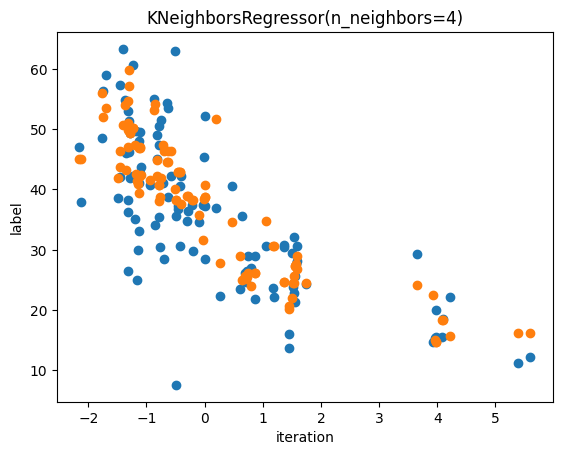

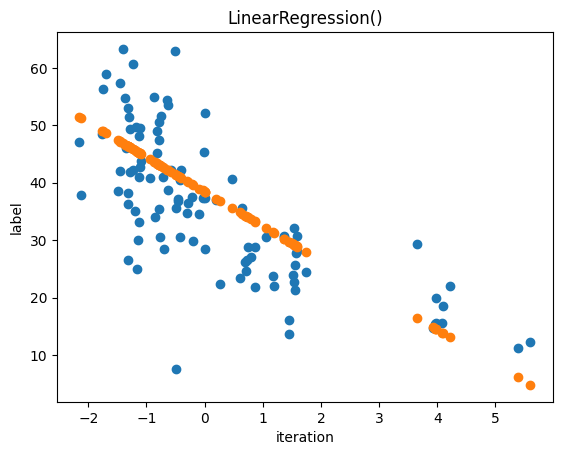

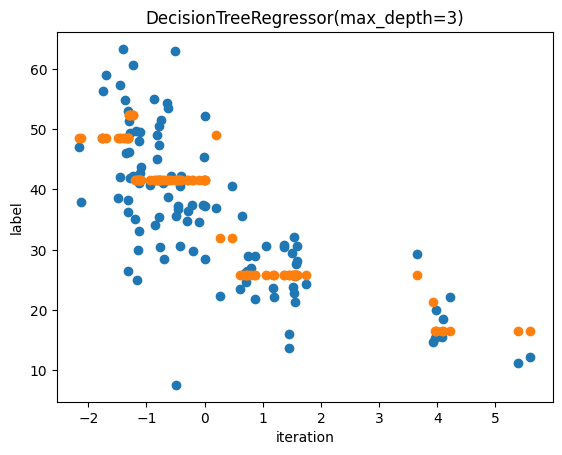

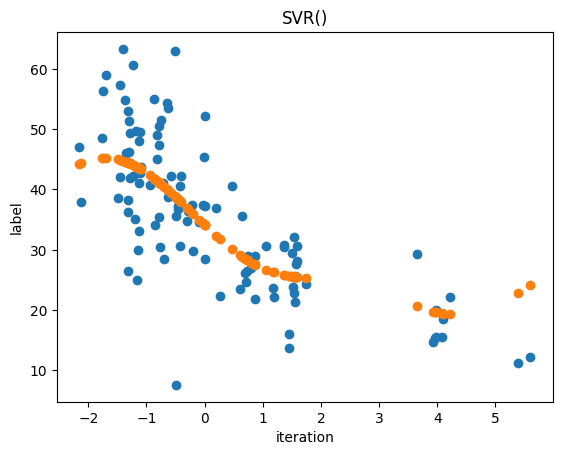

In [2]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load models
knn = KNeighborsRegressor(n_neighbors=4)
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=3)
svm = SVR()

models = [knn, lr, dt, svm]

# Visualize each model's performance
for i in range(1, data_df.shape[1]):
    X = data_df[data_df.columns[:-1]]
    y = data_df[data_df.columns[-1]]

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=i)
    X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Evaluate models and display scatter plots
    for model in models:
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        print(model, "PCA:", i, "MSE:", np.round(mean_squared_error(y_test, y_hat), 2))

        # Scatter plot for models with single component PCA
        if i == 1:
            fig, ax = plt.subplots(1, 1)
            ax.scatter(X_test, y_test, label="predicted")
            ax.scatter(X_test, y_hat, label='actual')

            ax.set_title(model)
            ax.set_xlabel('iteration')
            ax.set_ylabel('label')


Now, we're able to visually observe how each model predicts the data. While the MSE and MAE were influenced by the data transformation, they remain relatively close to the original values. It's challenging to distinguish whether this difference stems from random variations in the training and testing data or specifically from the PCA's impact. Reducing our data's dimensionality from 7 features to 1, we've sustained the effectiveness of our models.